<h1 style="text-align: center;">Bayesian programming Project</h1>
<p style="text-align: center;">SUPSI 3rd year Bachelor DS&AI</p>
<p style="text-align: center;">Tommaso Sommaruga, Miro Rava</p>

### `Introduction`
Football is a global phenomenon, with numerous championships showcasing distinct playing styles, team dynamics, and competitive structures. In this project, we focus on analyzing the differences and similarities between two of the most prominent football leagues: Serie A (Italy) and the Premier League (England).

The dataset used for this analysis is sourced from https://www.football-data.co.uk, a comprehensive repository of football match statistics. Each row in the dataset represents a matchday within a specific season for each championship with its related betting odds. While the dataset includes data from various global leagues, we have narrowed our scope to the Italian Serie A and the English Premier League to provide focused insights.

This project is structured around several statistical tasks aimed at uncovering meaningful patterns and testing hypotheses within the data:
- Exploratory Data Analysis: A detailed examination of the dataset to understand its structure and uncover initial trends.
- Hypothesis Testing: For each student, a hypothesis test will be conducted using Bayesian methods, with prior sensitivity analysis, posterior probability calculations (using ROPE), and a comparison with a frequentist approach.
- Regression Analysis: Each student will build a regression model, perform posterior predictive checks, and generate predictive distributions for test-set observations.
- Hierarchical vs. Unpooled Models: The group will construct both hierarchical and unpooled models, with a focus on comparing predictions for a specific group and analyzing the posterior distribution of a novel group.

---

## Data source
The following sources which have been utilised in the compilation of Football-Data's results and odds files.


Current results (full time, half time)
XScores - http://www.xscores .com

Match statistics
BBC, ESPN Soccer, Bundesliga.de, Gazzetta.it and Football.fr

Bookmakers betting odds
Betbrain.com
Oddsportal.com
Individual bookmakers

Betting odds for weekend games are collected Friday afternoons, and on Tuesday afternoons for midweek games.

### Dataset composition

In [31]:
import pandas as pd
import os
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data_folder = "data"

# Initialize lists for Premier League and Serie A datasets
#premier_league_files = [f for f in os.listdir(data_folder) if f.startswith("E0") and f.endswith(".csv")]
#serie_a_files = [f for f in os.listdir(data_folder) if f.startswith("I1") and f.endswith(".csv")]

#def load_and_combine(files, league_name):
#    combined_df = pd.DataFrame()
#    for file in files:
#        file_path = os.path.join(data_folder, file)
#        df = pd.read_csv(file_path)
#
#        # Extract season from the filename (e.g., 'E0_2023.csv' -> '2023')
#        season = file.split("_")[1].split(".")[0]
#        df["Season"] = season
#        df["League"] = league_name
#        combined_df = pd.concat([combined_df, df], ignore_index=True)
#    return combined_df

#premier_league_data = load_and_combine(premier_league_files, "Premier League")
#serie_a_data = load_and_combine(serie_a_files, "Serie A")

#all_data = pd.concat([premier_league_data, serie_a_data], ignore_index=True)#

#display(all_data.head())

#all_data.to_csv("combined_league_data.csv", index=False)
#print("Combined dataset saved as 'combined_league_data.csv'.")


In [3]:
data = pd.read_csv('combined_league_data.csv')

# Split data by league and season
serie_a_data = data[data['League'] == 'Serie A']
pl_data = data[data['League'] == 'Premier League']

display(serie_a_data.head())
display(pl_data.head())

C:\Users\miror\AppData\Local\Temp\ipykernel_6612\1491448300.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('combined_league_data.csv')


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA
3040,I1,24/08/2019,17:00,Parma,Juventus,0,1,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,I1,24/08/2019,19:45,Fiorentina,Napoli,3,4,A,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3042,I1,25/08/2019,17:00,Udinese,Milan,1,0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3043,I1,25/08/2019,19:45,Cagliari,Brescia,0,1,A,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3044,I1,25/08/2019,19:45,Roma,Genoa,3,3,D,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
serie_a_data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'LBH', 'LBD', 'LBA'],
      dtype='object', length=129)

---

## Data cleaning

In [5]:
serie_a_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 3040 to 6079
Columns: 129 entries, Div to LBA
dtypes: float64(105), int64(15), object(9)
memory usage: 3.0+ MB


In [6]:
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 3039
Columns: 129 entries, Div to LBA
dtypes: float64(105), int64(15), object(9)
memory usage: 3.0+ MB


In [7]:
data[data['Time'].isnull()]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA
380,E0,10/08/2018,NaN,Man United,Leicester,2,1,H,1.0,0.0,...,1.79,17.0,-0.75,1.75,1.70,2.29,2.21,NaN,NaN,NaN
381,E0,11/08/2018,NaN,Bournemouth,Cardiff,2,0,H,1.0,0.0,...,1.83,20.0,-0.75,2.20,2.13,1.80,1.75,NaN,NaN,NaN
382,E0,11/08/2018,NaN,Fulham,Crystal Palace,0,2,A,0.0,1.0,...,1.87,22.0,-0.25,2.18,2.11,1.81,1.77,NaN,NaN,NaN
383,E0,11/08/2018,NaN,Huddersfield,Chelsea,0,3,A,0.0,2.0,...,1.84,23.0,1.00,1.84,1.80,2.13,2.06,NaN,NaN,NaN
384,E0,11/08/2018,NaN,Newcastle,Tottenham,1,2,A,1.0,2.0,...,1.81,20.0,0.25,2.20,2.12,1.80,1.76,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,I1,20/05/18,NaN,Milan,Fiorentina,5,1,H,2.0,1.0,...,2.35,18.0,-0.75,2.11,2.03,1.86,1.81,1.80,3.80,4.00
6076,I1,20/05/18,NaN,Napoli,Crotone,2,1,H,2.0,0.0,...,2.78,19.0,-1.25,2.00,1.96,1.94,1.89,1.44,4.60,6.50
6077,I1,20/05/18,NaN,Sassuolo,Roma,0,1,A,0.0,1.0,...,2.57,18.0,0.50,2.06,2.01,1.89,1.85,3.80,3.80,1.85
6078,I1,20/05/18,NaN,Spal,Sampdoria,3,1,H,1.0,0.0,...,2.18,20.0,-1.00,2.13,2.06,1.84,1.80,1.61,4.00,5.20


In [8]:
nan_data = data.columns[data.isna().sum() > 400]
nan_data

Index(['Time', 'Referee', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA',
       'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5',
       'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA',
       'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA',
       'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA',
       'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD',
       'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5',
       'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA',
       'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'LBH', 'LBD', 'LBA'],
      dtype='object')

In [9]:
columns_to_drop = [
    'Time', 'Referee', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5',
    'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA',
    'Bb1X2', 'BbOU', 'BbAH', 'AHh', 'AHCh',
    'B365CH', 'BWCH', 'IWCH', 'WHCH', 'VCCH',
    'B365C>2.5', 'PC>2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5'
]
data = data.drop(columns=columns_to_drop)


In [10]:
# Define bookmaker-specific columns for home, draw, and away odds
home_odds_columns = ['B365H', 'BFH', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SOH', 'SBH', 'SJH', 'SYH', 'VCH', 'WHH']
draw_odds_columns = ['B365D', 'BFD', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SOD', 'SBD', 'SJD', 'SYD', 'VCD', 'WHD']
away_odds_columns = ['B365A', 'BFA', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SOA', 'SBA', 'SJA', 'SYA', 'VCA', 'WHA']

# Function to impute or derive maximum and average odds
def impute_or_derive_odds(data, max_col, avg_col, odds_columns):
    # Filter available odds columns
    available_odds = [col for col in odds_columns if col in data.columns]

    if not available_odds:
        raise ValueError(f"No bookmaker columns available to impute or derive {max_col} and {avg_col}.")

    # Impute missing values in available odds columns
    for col in available_odds:
        data[col] = data[col].fillna(data.groupby('Div')[col].transform('mean'))
        data[col] = data[col].ffill().bfill()

    # Derive Max and Avg odds
    data[max_col] = data[max_col].fillna(data[available_odds].max(axis=1))
    data[avg_col] = data[avg_col].fillna(data[available_odds].mean(axis=1))

# Impute or derive odds for home, draw, and away
impute_or_derive_odds(data, 'MaxH', 'AvgH', home_odds_columns)
impute_or_derive_odds(data, 'MaxD', 'AvgD', draw_odds_columns)
impute_or_derive_odds(data, 'MaxA', 'AvgA', away_odds_columns)

# Verify if there are any remaining NaN values in the critical columns
remaining_nans = data[['MaxH', 'AvgH', 'MaxD', 'AvgD', 'MaxA', 'AvgA']].isna().sum()
print("Remaining NaN values after imputation:")
print(remaining_nans)

Remaining NaN values after imputation:
MaxH    0
AvgH    0
MaxD    0
AvgD    0
MaxA    0
AvgA    0
dtype: int64


In [11]:
data.isna().sum()

Div            0
Date           0
HomeTeam       0
AwayTeam       0
FTHG           0
            ... 
BbMxAHA     3800
BbAvAHA     3800
LBH            0
LBD            0
LBA            0
Length: 101, dtype: int64

In [12]:
nan_cols = data.columns[(data.isna().sum() < 3) & (data.isna().sum() > 0)]
nan_cols

Index(['HTHG', 'HTAG', 'HTR'], dtype='object')

In [13]:
data[data['BWH'].isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx<2.5,BbAv<2.5,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA


In [14]:
data[data['B365H'].isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx<2.5,BbAv<2.5,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA


Cannot impute so, drop rows

In [15]:
odds_home = data['B365H'].values
data.loc[:, 'HomeWin'] = (data['FTR'] == 'H').astype(int)
home_win = data['HomeWin'].values

In [16]:
nan_data = data.columns[data.isna().sum() > 400]
nan_data

Index(['B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'B365AHH', 'B365AHA', 'PAHH',
       'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CD', 'B365CA',
       'BWCD', 'BWCA', 'IWCD', 'IWCA', 'WHCD', 'WHCA', 'VCCD', 'VCCA',
       'B365C<2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA',
       'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA'],
      dtype='object')

In [17]:
data = data.drop(columns=nan_data)

In [18]:
nan_cols = data.columns[data.isna().sum() > 0]
data[data[nan_cols].isnull().any(axis=1)]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgA,PSCH,PSCD,PSCA,Season,League,LBH,LBD,LBA,HomeWin
5337,I1,28/08/16,Sassuolo,Pescara,0,3,A,NaN,NaN,NaN,...,5.854286,1.66,4.0,5.99,2016,Serie A,1.62,3.75,5.75,0


This game had a result of 2-1 for Sassuolo.
The match was then awarded to Pescara by default, as the opposing team fielded a player who was not properly registered.

In [19]:
match_condition = (data['HomeTeam'] == 'Sassuolo') & (data['AwayTeam'] == 'Pescara')

data.loc[match_condition, 'FTHG'] = 2
data.loc[match_condition, 'FTAG'] = 1
data.loc[match_condition, 'FTR'] = 'H'
data.loc[match_condition, 'HTHG'] = 1
data.loc[match_condition, 'HTAG'] = 0
data.loc[match_condition, 'HTR'] = 'H'

print(data.loc[match_condition, ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR']])


      HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR
5337  Sassuolo  Pescara     2     1   H   1.0   0.0   H


---
# Hypothesis Testing: Does the Premier League Have a Home-Field Advantage?

### Hypotheses:
We are testing if the **Premier League (PL)** has a **significantly higher home-team advantage** compared to **Serie A**.

- **Null Hypothesis (H₀)**: There is no significant difference in home-team advantage between the Premier League and Serie A, or Serie A has a higher home-team advantage.  
  
  $ H_0: \mu_{PL} - \mu_{Serie A} \leq 0 $

- **Alternative Hypothesis (H₁)**: The Premier League has a **significantly higher home-team advantage** than Serie A.  
  
  $ H_1: \mu_{PL} - \mu_{Serie A} > 0 $

This is a **right-tailed test**, where we are testing if the **home win proportion** in the Premier League is **significantly greater** than that in Serie A.

---

### Test Setup:

- **Difference**: We calculate the difference between the **home-team win proportions** for Premier League and Serie A:  

  $ \text{Difference} = p_{PL} - p_{Serie A} $

- **Region of Practical Equivalence (ROPE)**:  
  We define a **ROPE** to assess if the difference falls within a range that would be considered practically equivalent:  
  **ROPE**: (-0.05, 0.05), meaning we are open to considering small differences as insignificant.

---

### Decision Criteria:

- **Reject H₀** if the **difference** is significantly greater than **0.05** (i.e., if the Premier League has a **significantly higher home win proportion** than Serie A).
- **Fail to Reject H₀** if the **difference** falls within the **ROPE** (-0.05, 0.05), indicating no practical difference.
  

In [20]:
# Initialize results storage
seasons = serie_a_data['Season'].unique()
posterior_means_serie_a = []
posterior_means_pl = []
posterior_diffs = []
trace_samples_serie_a = []
trace_samples_pl = []

# Define function to extract home wins and total matches
def get_season_data(serie_a_season, pl_season):
    n_serie_a = serie_a_season.shape[0]  # Total matches
    wins_serie_a = (serie_a_season['FTR'] == 'H').sum()  # Home wins in Serie A
    n_pl = pl_season.shape[0]  # Total matches
    wins_pl = (pl_season['FTR'] == 'H').sum()  # Home wins in PL
    return n_serie_a, wins_serie_a, n_pl, wins_pl

# Define Bayesian model
def run_bayesian_model(n_serie_a, wins_serie_a, n_pl, wins_pl):
    with pm.Model() as model:
        # Priors for home win proportions
        p_serie_a = pm.Beta('p_serie_a', alpha=4, beta=6)
        p_pl = pm.Beta('p_pl', alpha=4, beta=6)

        # Binomial likelihood for both leagues
        home_wins_serie_a = pm.Binomial('home_wins_serie_a', n=n_serie_a, p=p_serie_a, observed=wins_serie_a)
        home_wins_pl = pm.Binomial('home_wins_pl', n=n_pl, p=p_pl, observed=wins_pl)

        # Sampling
        trace = pm.sample(2000, return_inferencedata=False)

    return trace

# Iterate over seasons
for season in seasons:
    # Filter data for the season
    serie_a_season = serie_a_data[serie_a_data['Season'] == season]
    pl_season = pl_data[pl_data['Season'] == season]

    # Get season-specific data
    n_serie_a, wins_serie_a, n_pl, wins_pl = get_season_data(serie_a_season, pl_season)

    # Run the Bayesian model
    trace = run_bayesian_model(n_serie_a, wins_serie_a, n_pl, wins_pl)

    # Extract posterior sample
    p_serie_a_samples = trace['p_serie_a']
    p_pl_samples = trace['p_pl']
    difference_samples = p_serie_a_samples - p_pl_samples

    # Store results
    posterior_means_serie_a.append(np.mean(p_serie_a_samples))
    posterior_means_pl.append(np.mean(p_pl_samples))
    posterior_diffs.append(np.mean(difference_samples))
    trace_samples_serie_a.append(p_serie_a_samples)
    trace_samples_pl.append(p_pl_samples)

# Create DataFrame with results
results = pd.DataFrame({
    'Season': seasons,
    'Serie_A_Mean': posterior_means_serie_a,
    'PL_Mean': posterior_means_pl,
    'Difference': posterior_diffs
})
results.sort_values(by='Season', inplace=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_serie_a, p_pl]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


In [21]:
display(results)

,Season,Serie_A_Mean,PL_Mean,Difference
6,2016,0.481853,0.489499,-0.007646
7,2017,0.430868,0.454218,-0.023350
1,2018,0.435694,0.473971,-0.038277
0,2019,0.415606,0.451331,-0.035724
4,2020,0.407451,0.379393,0.028058
5,2021,0.389598,0.428885,-0.039287
3,2022,0.422903,0.481878,-0.058976
2,2023,0.417764,0.459078,-0.041314


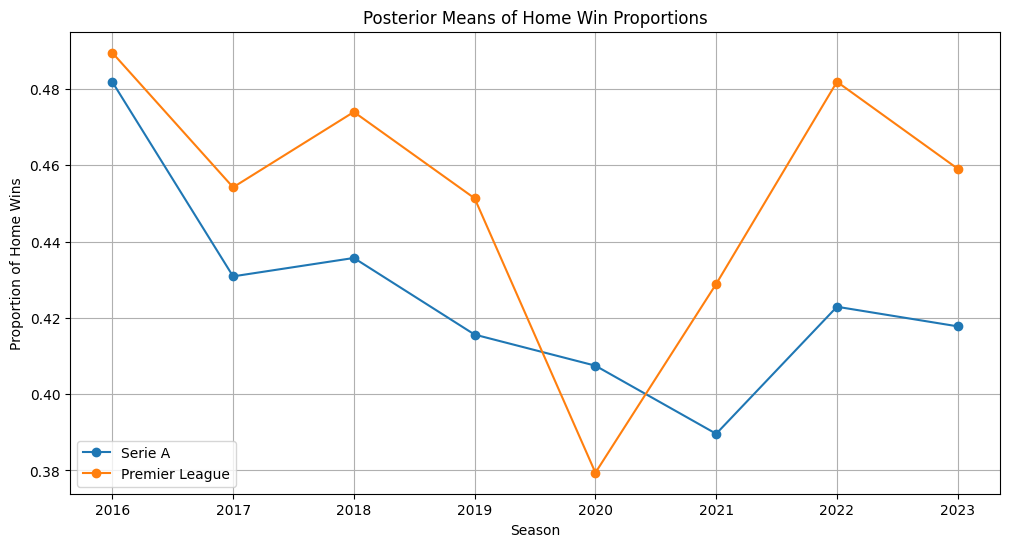

In [22]:
# Plot posterior means for Serie A and PL
plt.figure(figsize=(12, 6))
plt.plot(results['Season'], results['Serie_A_Mean'], marker='o', label='Serie A')
plt.plot(results['Season'], results['PL_Mean'], marker='o', label='Premier League')
plt.title('Posterior Means of Home Win Proportions')
plt.xlabel('Season')
plt.ylabel('Proportion of Home Wins')
plt.legend()
plt.grid()
plt.show()

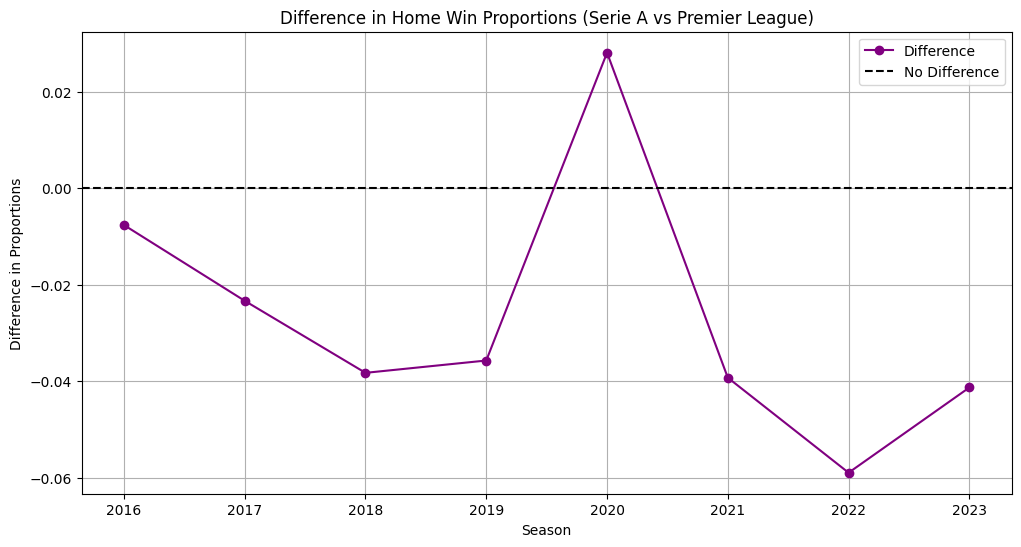

In [23]:
# Plot the differences across seasons
plt.figure(figsize=(12, 6))
plt.plot(results['Season'], results['Difference'], marker='o', color='purple', label='Difference')
plt.axhline(0, color='black', linestyle='--', label='No Difference')
plt.title('Difference in Home Win Proportions (Serie A vs Premier League)')
plt.xlabel('Season')
plt.ylabel('Difference in Proportions')
plt.legend()
plt.grid()
plt.show()

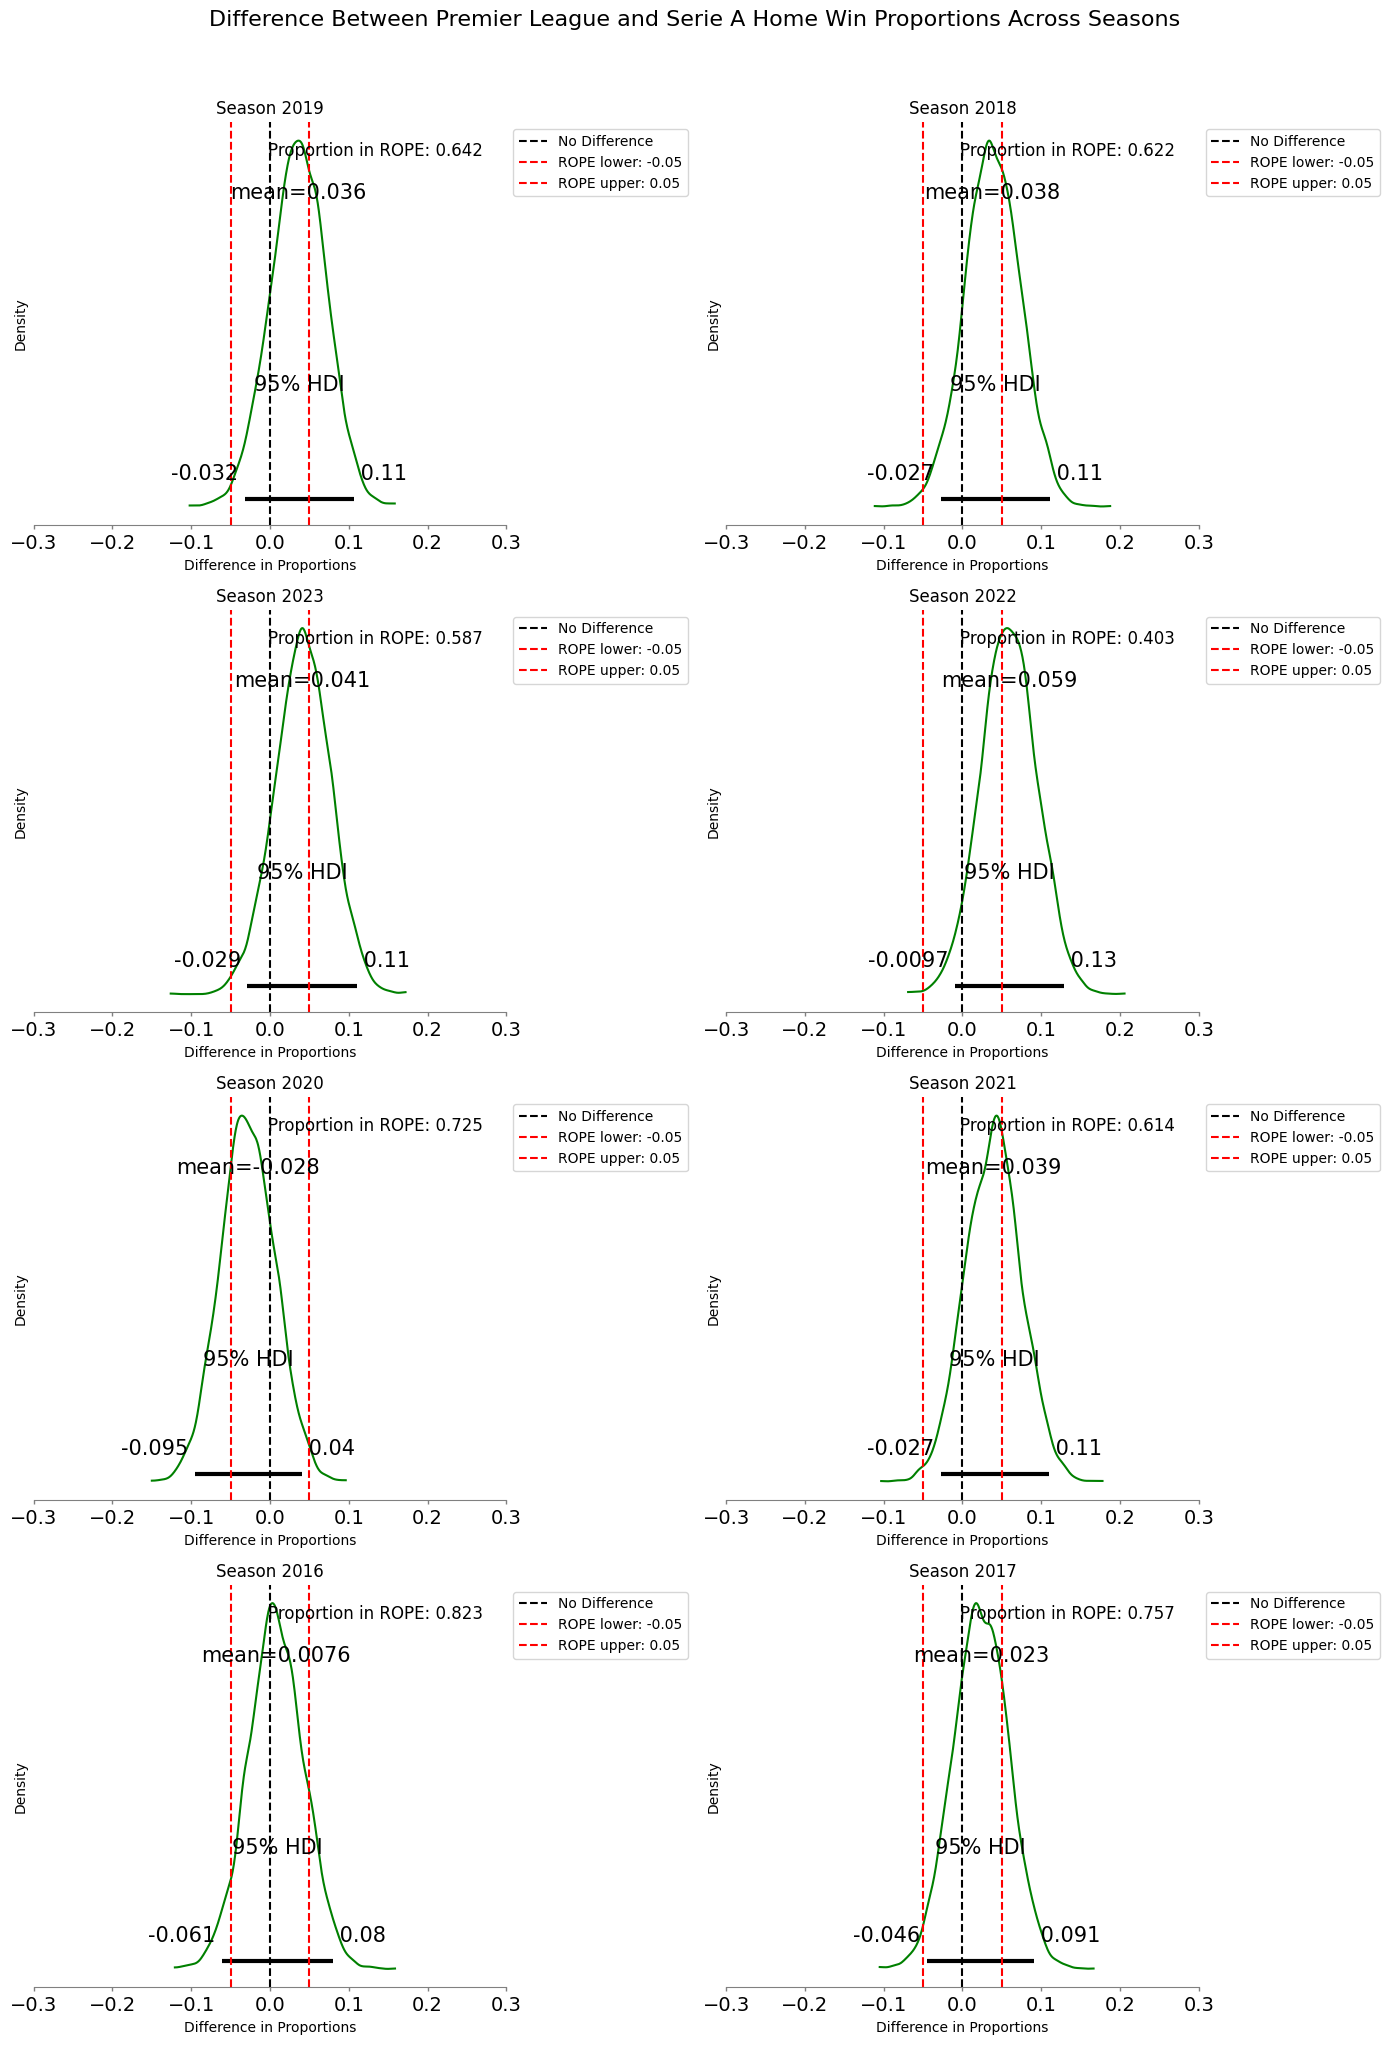

In [24]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Initialize the rope limits
rope = (-0.05, 0.05)

pl_higher_probs = []
serie_a_higher_probs = []
all_difference_samples = []
in_rope_data = []

# Prepare the figure for plotting
plt.figure(figsize=(14, 20))  # Increase the figure size for larger plots

# Loop through each season and plot the posterior difference distributions
for idx, season in enumerate(seasons):
    difference_samples = trace_samples_pl[idx] - trace_samples_serie_a[idx]  # Corrected order for the PL vs Serie A difference
    all_difference_samples.extend(difference_samples)
    # Calculate the proportion of difference samples within the ROPE
    in_rope = np.sum((difference_samples >= rope[0]) & (difference_samples <= rope[1])) / len(difference_samples)
    in_rope_data.append(in_rope)
    # ArviZ: Plot posterior distribution of the difference
    plt.subplot(len(seasons) // 2 + len(seasons) % 2, 2, idx + 1)  # Two plots per row
    az.plot_posterior(difference_samples, hdi_prob=0.95, color='green', ax=plt.gca())

    # Add vertical lines for ROPE and no difference
    plt.axvline(0, color='black', linestyle='--', label='No Difference')
    plt.axvline(rope[0], color='red', linestyle='--', label=f'ROPE lower: {rope[0]}')
    plt.axvline(rope[1], color='red', linestyle='--', label=f'ROPE upper: {rope[1]}')

    # Move the text annotation outside the plot area
    plt.text(0.95, 0.95, f"Proportion in ROPE: {in_rope:.3f}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Title and labels for individual plots (Year for each season)
    plt.title(f"Season {season}")
    plt.xlabel('Difference in Proportions')
    plt.ylabel('Density')
    plt.xlim(-0.3, 0.3)  # Set consistent x-axis limits

    # Adjust legend to not overlap with the plot area
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

    # Right-tailed testing (probability of PL > Serie A)
    pl_higher_prob = np.mean(difference_samples > 0.05)

    # Left-tailed testing (probability of Serie A > PL)
    serie_a_higher_prob = np.mean(difference_samples < -0.05)

    pl_higher_probs.append(pl_higher_prob)
    serie_a_higher_probs.append(serie_a_higher_prob)

# Add a single overarching title for all plots
plt.suptitle('Difference Between Premier League and Serie A Home Win Proportions Across Seasons', fontsize=16, y=1.02)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()



In [25]:
print(pl_higher_probs)
print(serie_a_higher_probs)
print(in_rope_data)

[0.349875, 0.3705, 0.408125, 0.596, 0.012, 0.38, 0.122125, 0.224875]
[0.0085, 0.00725, 0.00525, 0.001375, 0.26275, 0.006125, 0.054875, 0.018125]
[0.641625, 0.62225, 0.586625, 0.402625, 0.72525, 0.613875, 0.823, 0.757]


In [26]:
# Print out the results of the hypothesis test
for idx, season in enumerate(seasons):
    print(f"Season {season}:")

    print(f"  Probability of PL having a higher home win proportion: {pl_higher_probs[idx]:.3f}")
    print(f"  Probability of Serie A having a higher home win proportion: {serie_a_higher_probs[idx]:.3f}")
    print(f"  Proportion of difference samples in the ROPE: {in_rope_data[idx]:.3f}")
    print("\n")


Season 2019:
  Probability of PL having a higher home win proportion: 0.350
  Probability of Serie A having a higher home win proportion: 0.009
  Proportion of difference samples in the ROPE: 0.642


Season 2018:
  Probability of PL having a higher home win proportion: 0.370
  Probability of Serie A having a higher home win proportion: 0.007
  Proportion of difference samples in the ROPE: 0.622


Season 2023:
  Probability of PL having a higher home win proportion: 0.408
  Probability of Serie A having a higher home win proportion: 0.005
  Proportion of difference samples in the ROPE: 0.587


Season 2022:
  Probability of PL having a higher home win proportion: 0.596
  Probability of Serie A having a higher home win proportion: 0.001
  Proportion of difference samples in the ROPE: 0.403


Season 2020:
  Probability of PL having a higher home win proportion: 0.012
  Probability of Serie A having a higher home win proportion: 0.263
  Proportion of difference samples in the ROPE: 0.725




In [27]:
overall_pl_higher_prob = np.mean(pl_higher_probs)
overall_in_rope = np.mean(in_rope_data)

print(f"Overall probability of PL having a higher home win proportion than Serie A: {overall_pl_higher_prob:.3f}")
print(f"Overall proportion of difference samples in the ROPE: {overall_in_rope:.3f}")

# Interpret the results
if overall_pl_higher_prob > 0.95:
    print("Conclusion: There is strong evidence to reject the null hypothesis (H₀), suggesting the Premier League has a significantly higher home-team advantage than Serie A.")
else:
    print("Conclusion: There is insufficient evidence to reject the null hypothesis (H₀), suggesting no significant difference between Serie A and Premier League in home-team advantage.")


Overall probability of PL having a higher home win proportion than Serie A: 0.308
Overall proportion of difference samples in the ROPE: 0.647
Conclusion: There is insufficient evidence to reject the null hypothesis (H₀), suggesting no significant difference between Serie A and Premier League in home-team advantage.


By applying Bayesian modeling with PyMC and analyzing the posterior distributions, we are able to assess:
The home win proportions for both Serie A and Premier League over multiple seasons.
The difference between these proportions, helping us evaluate if Serie A has a higher proportion of home wins than the Premier League.
The hypothesis testing using the ROPE, which allows us to determine if the differences are practically significant.
The probabilistic interpretation of the differences, such as the probability that Serie A has a higher home win proportion.
This approach ensures that your analysis takes full advantage of probabilistic programming, providing a more robust and data-driven conclusion.

# Hypothesis Testing 2: Do High-Scoring Matches Have a Higher Probability of Ending in a Draw?

### Hypotheses:
We are testing if **high-scoring matches** (total goals ≥ threshold) are more likely to end in a **draw** compared to **low-scoring matches** (total goals < threshold).

- **Null Hypothesis (H₀)**: High-scoring matches have the same or a lower probability of ending in a draw compared to low-scoring matches.  

  $ H_0: p_{high} - p_{low} \leq 0 $

- **Alternative Hypothesis (H₁)**: High-scoring matches have a **higher probability** of ending in a draw compared to low-scoring matches.  

  $ H_1: p_{high} - p_{low} > 0 $

This is a **right-tailed test**, focusing on whether the probability of a draw is **significantly greater** for high-scoring matches.

---

### Test Setup:

- **Difference**: We calculate the difference between the proportions of draws in high- and low-scoring matches:

  $ \text{Difference} = p_{high} - p_{low} $

- **Region of Practical Equivalence (ROPE)**:  
  We define a **ROPE** to assess if the difference falls within a range that would be considered practically equivalent:  
  **ROPE**: (-0.05, 0.05), meaning differences smaller than 5 percentage points are considered negligible.

---

### Decision Criteria:

- **Reject H₀** if the **difference** is significantly greater than **0.03** (i.e., high-scoring matches are more likely to end in a draw).
- **Fail to Reject H₀** if the **difference** falls within the **ROPE** (-0.05, 0.05), indicating no meaningful difference. 

In [28]:
data['TotalGoals'] = data['FTHG'] + data['FTAG']
# Calculate basic summary statistics for TotalGoals
total_goals_summary = data['TotalGoals'].describe()

# Show the summary statistics
total_goals_summary

count    6080.000000
mean        2.819243
std         1.669144
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: TotalGoals, dtype: float64

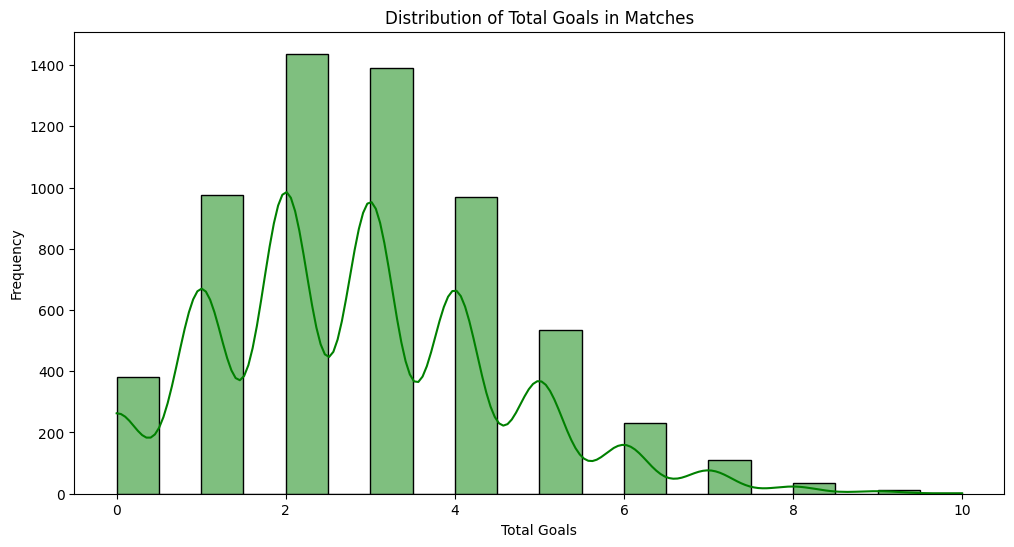

In [29]:
# Visualize the distribution of total goals in matches
plt.figure(figsize=(12, 6))
sns.histplot(data['TotalGoals'], kde=True, bins=20, color='green')
plt.title('Distribution of Total Goals in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

### Exploratory Data Analysis (EDA) for Total Goals:

- **Distribution**: The distribution of total goals across matches shows a peak around 2-3 goals, with a tail extending towards higher values (up to 10 total goals).
- **Summary Statistics**:
  - The average total goals per match is **2.82**.
  - The median (50th percentile) is **3**, suggesting that a large number of matches have around 3 goals.
  - The range of total goals is from **0** to **10**, indicating a few high-scoring outlier matches.

### Suggested Threshold:
Based on the distribution, it might make sense to set the **threshold for high-scoring matches** at **3 goals**. Matches with a total of **3 or more goals** can be classified as high-scoring, while those with fewer than 3 goals can be classified as low-scoring.

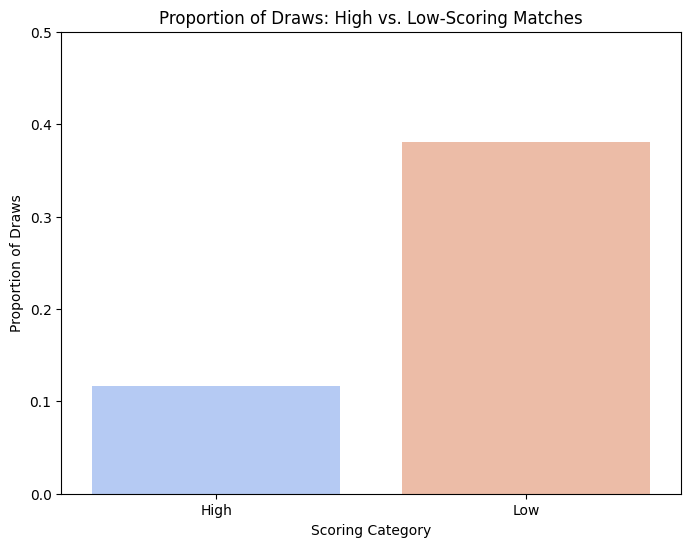

In [32]:
# Create a new column for scoring category based on the threshold
data['ScoringCategory'] = data['TotalGoals'].apply(lambda x: 'High' if x >= 3 else 'Low')

# Calculate the proportion of draws in each scoring category
draw_proportions = data.groupby('ScoringCategory')['FTR'].apply(
    lambda x: (x == 'D').mean()
).reset_index(name='DrawProportion')

# Visualize the proportion of draws in high vs. low-scoring matches
plt.figure(figsize=(8, 6))
sns.barplot(data=draw_proportions, x='ScoringCategory', y='DrawProportion', palette='coolwarm')
plt.title('Proportion of Draws: High vs. Low-Scoring Matches')
plt.xlabel('Scoring Category')
plt.ylabel('Proportion of Draws')
plt.ylim(0, 0.5)
plt.show()

In [33]:
# Display the calculated proportions
draw_proportions

,ScoringCategory,DrawProportion
0,High,0.116895
1,Low,0.381038


### Results:
- The proportion of draws in **high-scoring matches** is approximately **11.7%**.
- The proportion of draws in **low-scoring matches** is significantly higher, at around **38.1%**.

This suggests that low-scoring matches are much more likely to result in a draw than high-scoring matches.

---

We can now move forward with the hypothesis testing:
- **Null Hypothesis ($H_0$)**: High-scoring matches have the same or a lower probability of resulting in a draw compared to low-scoring matches.
- **Alternative Hypothesis ($H_1$)**: High-scoring matches have a lower probability of resulting in a draw compared to low-scoring matches.

To conduct the Bayesian analysis, we will:

1. **Define the Model**:
   - Prior: Use a **Beta prior**, as it models probabilities.
   - Likelihood: Use a **Binomial likelihood**, based on the number of draws in high- and low-scoring matches.

2. **Estimate Posteriors**:
   - Compute posterior distributions for the draw probabilities in high and low-scoring matches.
   - Calculate the difference between the probabilities.

3. **Use ROPE**:
   - Define a Region of Practical Equivalence (ROPE) to evaluate the practical significance of the difference.

4. **Compare Results**:
   - Compare Bayesian findings with a frequentist hypothesis test.

In [34]:
# Count the number of draws and total matches in each scoring category
draw_counts = data.groupby('ScoringCategory')['FTR'].apply(lambda x: (x == 'D').sum())
total_counts = data.groupby('ScoringCategory')['FTR'].count()

# Extract counts for high and low-scoring matches
draw_high, draw_low = draw_counts['High'], draw_counts['Low']
total_high, total_low = total_counts['High'], total_counts['Low']

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_high, p_low]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


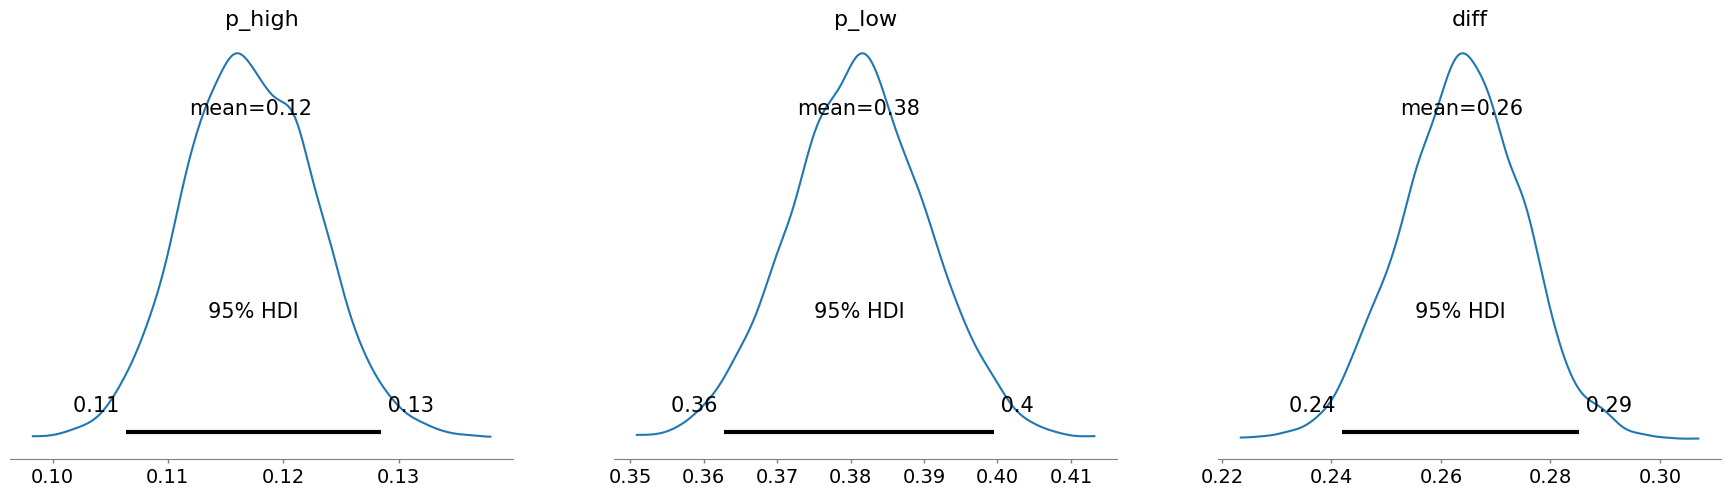

In [37]:
# Define the Bayesian model
with pm.Model() as model:
    # Priors for draw probabilities (Beta prior: uniform)
    p_high = pm.Beta('p_high', alpha=1, beta=1)
    p_low = pm.Beta('p_low', alpha=1, beta=1)
    
    # Likelihood for the observed draws
    draws_high = pm.Binomial('draws_high', n=total_high, p=p_high, observed=draw_high)
    draws_low = pm.Binomial('draws_low', n=total_low, p=p_low, observed=draw_low)
    
    # Difference between high and low draw probabilities
    diff = pm.Deterministic('diff', p_low - p_high)
    
    # Sampling from the posterior, directly returning InferenceData
    trace = pm.sample(2000, cores=2, return_inferencedata=True)

# Summarize and visualize the posterior distributions
az.plot_posterior(trace, var_names=['p_high', 'p_low', 'diff'], hdi_prob=0.95)
plt.show()

In [39]:
# Extract summary statistics for the posterior
posterior_summary = az.summary(trace, var_names=['p_high', 'p_low', 'diff'])
posterior_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_high,0.117,0.006,0.107,0.128,0.0,0.0,3996.0,3380.0,1.0
p_low,0.381,0.009,0.364,0.399,0.0,0.0,3898.0,3067.0,1.0
diff,0.264,0.011,0.243,0.284,0.0,0.0,3812.0,2884.0,1.0


To evaluate the **Region of Practical Equivalence (ROPE)**, we will:

1. Define a ROPE for the difference in draw probabilities ($ p_{low} - p_{high} $):
   - Suggested range: $[-0.03, 0.03]$, meaning differences smaller than 3 percentage points are practically negligible.
2. Check the proportion of the posterior distribution of the difference that falls:
   - **Within the ROPE**: Indicates no meaningful difference.
   - **Below the ROPE**: Suggests $ p_{low} $ is significantly smaller than $ p_{high} $.
   - **Above the ROPE**: Suggests $ p_{low} $ is significantly greater than $ p_{high} $.

In [41]:
# Define the ROPE range
rope_min, rope_max = -0.05, 0.05

# Extract the posterior samples for the difference
diff_posterior = trace.posterior['diff'].values.flatten()

# Compute the proportions of the posterior within, below, and above the ROPE
within_rope = np.mean((diff_posterior >= rope_min) & (diff_posterior <= rope_max))
below_rope = np.mean(diff_posterior < rope_min)
above_rope = np.mean(diff_posterior > rope_max)

# Display the results
rope_results = {
    "Proportion within ROPE": within_rope,
    "Proportion below ROPE": below_rope,
    "Proportion above ROPE": above_rope
}
rope_results

{'Proportion within ROPE': 0.0,
 'Proportion below ROPE': 0.0,
 'Proportion above ROPE': 1.0}

<Figure size 800x600 with 0 Axes>

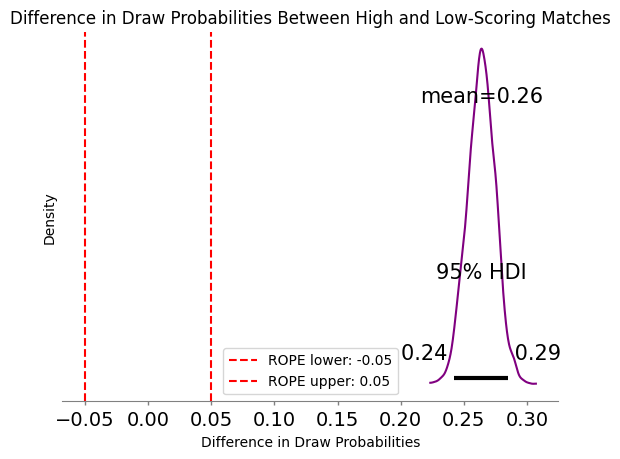

In [43]:
#plot rope
plt.figure(figsize=(8, 6))
az.plot_posterior(diff_posterior, hdi_prob=0.95, color='purple')
plt.axvline(rope_min, color='red', linestyle='--', label=f'ROPE lower: {rope_min}')
plt.axvline(rope_max, color='red', linestyle='--', label=f'ROPE upper: {rope_max}')
plt.title('Difference in Draw Probabilities Between High and Low-Scoring Matches')
plt.xlabel('Difference in Draw Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()

The Bayesian analysis indicates that the **proportion of the posterior above the ROPE is 1.0**, meaning there is strong evidence that **low-scoring matches have a significantly higher probability of ending in a draw than high-scoring matches**.

### Frequentist Comparison:

To compare results, we will:
1. Perform a **two-proportion z-test** to compare the draw probabilities for high- and low-scoring matches.
2. Compute the p-value to determine if the difference is statistically significant.

In [42]:
from statsmodels.stats.proportion import proportions_ztest
# Counts of draws and total matches for high and low-scoring matches
counts = np.array([draw_low, draw_high])
nobs = np.array([total_low, total_high])
# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='larger')

# Display the z-statistic and p-value
frequentist_results = {
    "Z-Statistic": z_stat,
    "P-Value": p_value
}
frequentist_results

{'Z-Statistic': 24.092242796116704, 'P-Value': 1.5072194045510875e-128}

### Frequentist Test Results:

- **Z-Statistic**: 24.09  
  A very high Z-statistic suggests that the observed difference in draw proportions between high- and low-scoring matches is far from what would be expected under the null hypothesis.

- **P-Value**: $ 1.51 \times 10^{-128}\\ $ 
  This extremely small p-value indicates overwhelming evidence against the null hypothesis. The difference in draw proportions is statistically significant.

---

### Conclusion:

- **Bayesian Analysis**: The posterior probability of the difference being above the ROPE was 1.0, strongly supporting that low-scoring matches have a higher draw probability.
- **Frequentist Analysis**: The p-value confirms this result with high statistical significance.

Both methods are in agreement: **low-scoring matches are significantly more likely to end in a draw compared to high-scoring matches.**


### Regression task 1

Bayesian Logistic Regression to predict the probability of a home team winning a game based on the odds. It assumes prior uncertainty about the model's coefficients (intercept and slope) and updates these beliefs using data. MCMC sampling is used to estimate the posterior distributions of the coefficients, giving us a range of possible values rather than fixed ones. This approach helps quantify uncertainty.

# Bayesian Logistic Regression Model Description

This model is a **Bayesian Logistic Regression**, where the goal is to predict the probability of a binary outcome (home win) based on the odds of the home team winning.

- **Priors:**
  - The intercept (β₀) follows a normal distribution with a mean of 0 and a standard deviation of 5.
  - The slope (β₁) follows a normal distribution with a mean of 0 and a standard deviation of 1.

- **Logistic Regression Model:**
  The log-odds (logit) of the outcome is modeled as a linear function of the home team odds:
  $$ \text{logit}(p) = \beta_0 + \beta_1 \times \text{odds\_home} $$
  where $ p $ is the probability of a home win.

- **Likelihood:**
  The observed data is modeled using a Bernoulli distribution with the probability $ p $ derived from the logistic function.

- **Sampling:**
  Posterior distributions of the parameters (β₀ and β₁) are estimated using Markov Chain Monte Carlo (MCMC) sampling.

- **Inference:**
  The posterior distributions of the parameters are visualized, and predictions are made for the probability of a home win across a range of odds. Uncertainty is captured by plotting the 95% Highest Density Interval (HDI) for the parameters.

In [28]:
# Bayesian Logistic Regression Model
with pm.Model() as model:
    # Priors for intercept and slope (coefficients)
    beta_0 = pm.Normal('beta_0', mu=0, sigma=5)  # Intercept prior
    beta_1 = pm.Normal('beta_1', mu=0, sigma=1)  # Slope prior

    # Logistic regression model (log-odds to probability)
    logit_p = beta_0 + beta_1 * odds_home
    p = pm.Deterministic('p', 1 / (1 + np.exp(-logit_p)))  # Logistic function for probability

    # Likelihood (Bernoulli distribution for binary outcome)
    Y_obs = pm.Bernoulli('Y_obs', p=p, observed=home_win)

    # Sampling (MCMC) to estimate the posterior with return_inferencedata=True
    trace = pm.sample(2000, return_inferencedata=True)

# Trace summary to inspect posterior estimates
pm.summary(trace)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,1.333,0.066,1.210,1.452,0.002,0.001,1902.0,1677.0,1.0
beta_1,-0.601,0.025,-0.647,-0.553,0.001,0.000,1915.0,1610.0,1.0
p[0],0.656,0.009,0.640,0.675,0.000,0.000,2177.0,2055.0,1.0
p[1],0.003,0.001,0.002,0.004,0.000,0.000,1997.0,1769.0,1.0
p[2],0.540,0.007,0.526,0.554,0.000,0.000,3429.0,4138.0,1.0
...,...,...,...,...,...,...,...,...,...
p[6075],0.558,0.008,0.544,0.573,0.000,0.000,3075.0,3754.0,1.0
p[6076],0.606,0.008,0.591,0.622,0.000,0.000,2485.0,2604.0,1.0
p[6077],0.255,0.009,0.237,0.273,0.000,0.000,2985.0,3145.0,1.0
p[6078],0.590,0.008,0.575,0.606,0.000,0.000,2636.0,2894.0,1.0


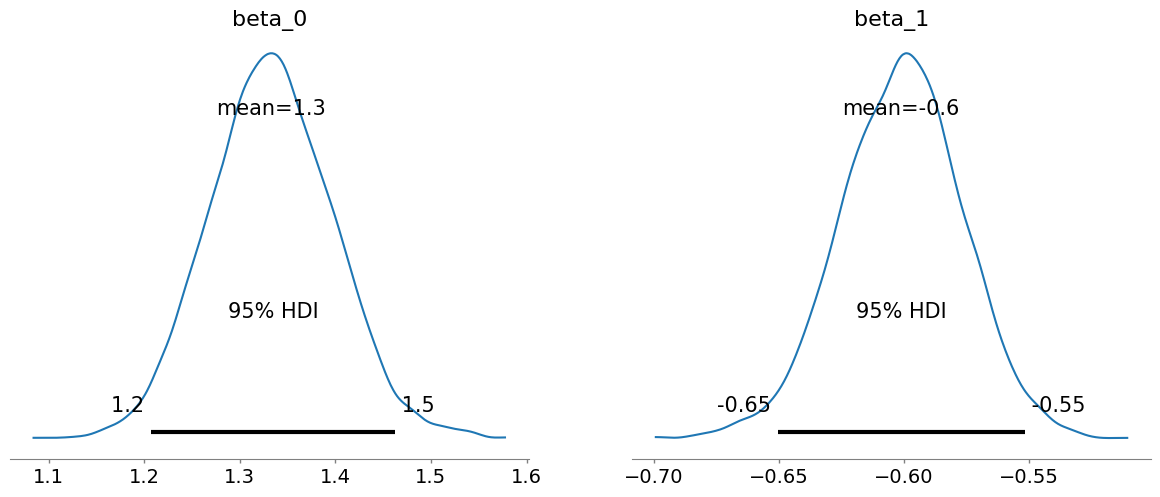

In [29]:
# Plotting posterior distribution of beta_0 and beta_1
pm.plot_posterior(trace, var_names=['beta_0', 'beta_1'], hdi_prob=0.95)
plt.show()


In [30]:
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

# PART 1: Data Preparation
data['B365H'] = data['B365H'].fillna(data[['B365H', 'BWH']].mean(axis=1))
data = data.dropna(subset=['B365H'])
data['HomeWin'] = (data['FTR'] == 'H').astype(int)

# Extract relevant variables
odds_home = data['B365H'].values
home_win = data['HomeWin'].values

# PART 2: Bayesian Logistic Regression Model
with pm.Model() as model:
    # Priors
    beta_0 = pm.Normal('beta_0', mu=0, sigma=5)  # Prior for intercept
    beta_1 = pm.Normal('beta_1', mu=0, sigma=1)  # Prior for slope

    # Logistic regression (log-odds to probability)
    logit_p = beta_0 + beta_1 * odds_home
    p = pm.Deterministic('p', 1 / (1 + np.exp(-logit_p)))  # Convert to probability

    # Likelihood
    Y_obs = pm.Bernoulli('Y_obs', p=p, observed=home_win)

    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# PART 3: Visualization


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


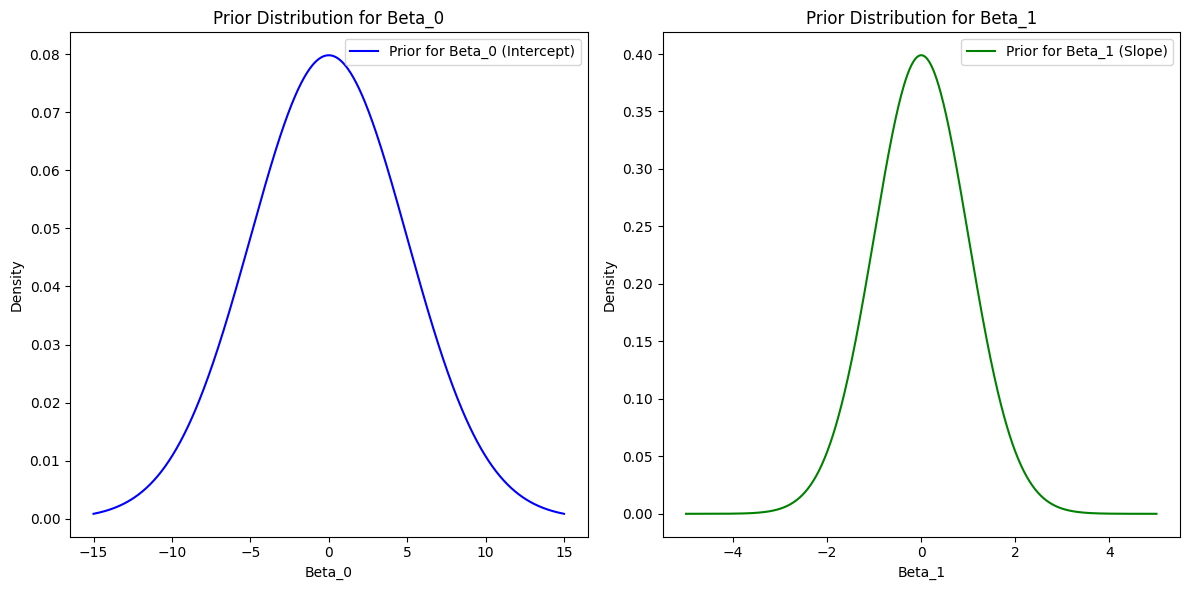

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Plot priors
x_beta_0 = np.linspace(-15, 15, 500)  # Range for intercept
x_beta_1 = np.linspace(-5, 5, 500)   # Range for slope

# Prior distributions
prior_beta_0 = np.exp(-0.5 * (x_beta_0 / 5)**2) / (5 * np.sqrt(2 * np.pi))  # N(0, 5)
prior_beta_1 = np.exp(-0.5 * (x_beta_1 / 1)**2) / (1 * np.sqrt(2 * np.pi))  # N(0, 1)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_beta_0, prior_beta_0, label='Prior for Beta_0 (Intercept)', color='blue')
plt.title('Prior Distribution for Beta_0')
plt.xlabel('Beta_0')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_beta_1, prior_beta_1, label='Prior for Beta_1 (Slope)', color='green')
plt.title('Prior Distribution for Beta_1')
plt.xlabel('Beta_1')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


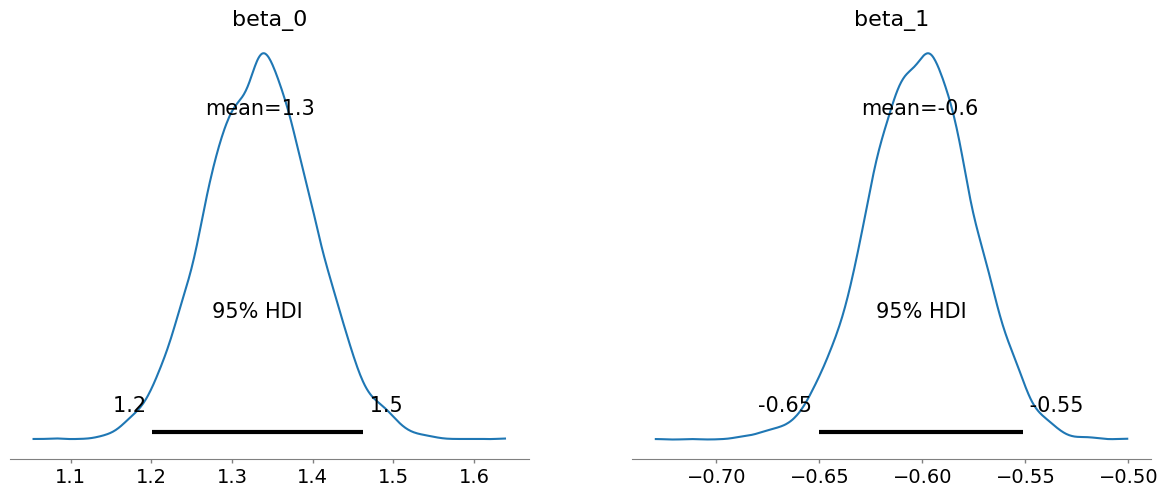

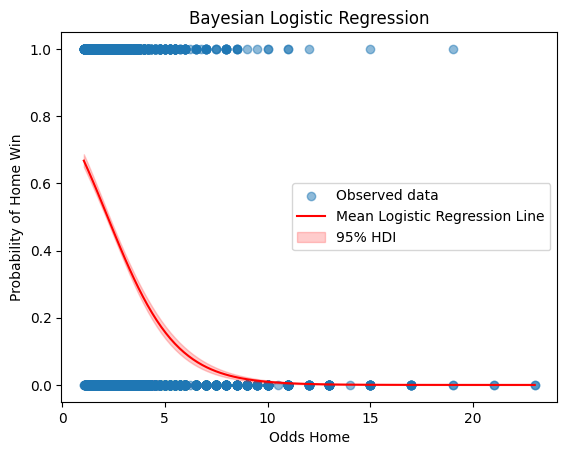

In [32]:

# 3.2: Plot posterior distributions
pm.plot_posterior(trace, var_names=['beta_0', 'beta_1'], hdi_prob=0.95)
plt.show()

# 3.3: Plot regression lines and uncertainty
beta_0_samples = trace.posterior['beta_0'].values.flatten()
beta_1_samples = trace.posterior['beta_1'].values.flatten()

# Generate predictions for a range of odds
odds_range = np.linspace(min(odds_home), max(odds_home), 100)
probs_samples = 1 / (1 + np.exp(-(beta_0_samples[:, None] + beta_1_samples[:, None] * odds_range)))

# Plot data points
plt.scatter(odds_home, home_win, alpha=0.5, label="Observed data")

# Plot the mean logistic regression curve
mean_probs = probs_samples.mean(axis=0)
plt.plot(odds_range, mean_probs, color='red', label="Mean Logistic Regression Line")

# Add uncertainty region (HDI 95%)
lower_bound = np.percentile(probs_samples, 2.5, axis=0)
upper_bound = np.percentile(probs_samples, 97.5, axis=0)
plt.fill_between(odds_range, lower_bound, upper_bound, color='red', alpha=0.2, label="95% HDI")

plt.xlabel('Odds Home')
plt.ylabel('Probability of Home Win')
plt.title('Bayesian Logistic Regression')
plt.legend()
plt.show()


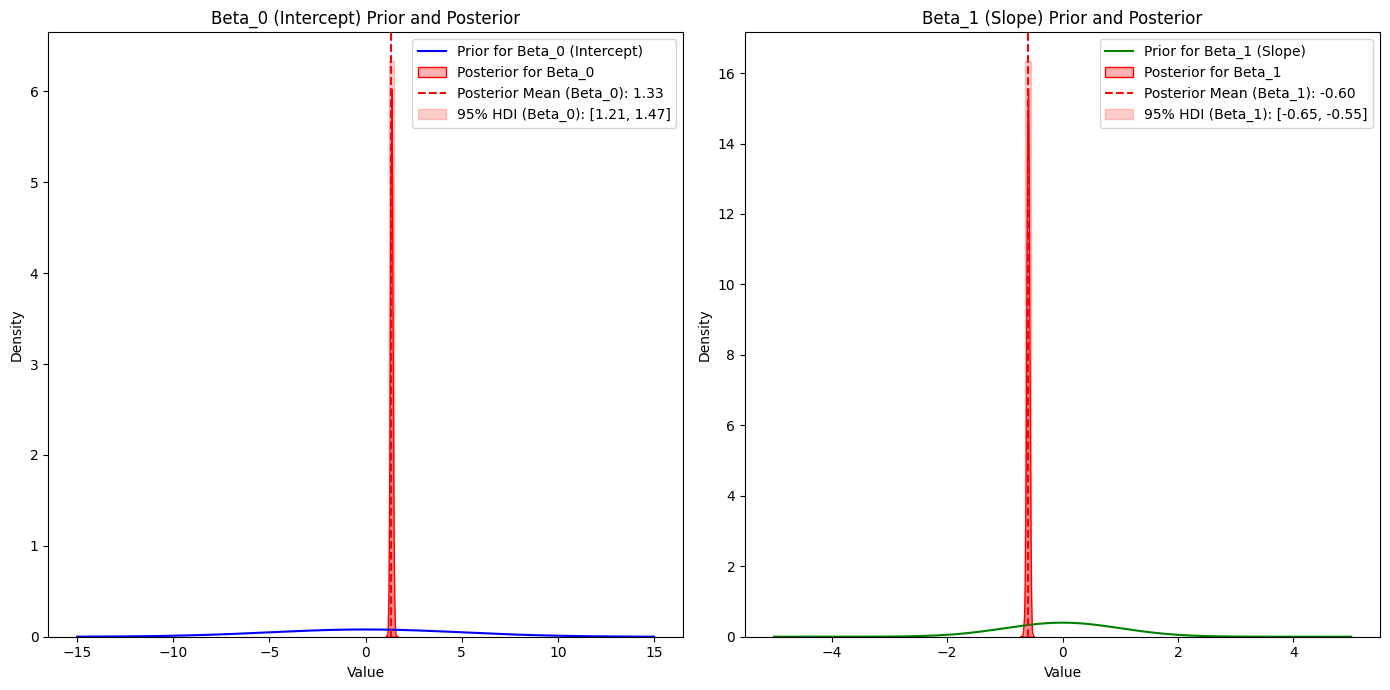

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

# Extract posterior samples from the trace
beta_0_samples = trace.posterior['beta_0'].values.flatten()
beta_1_samples = trace.posterior['beta_1'].values.flatten()

# Define ranges for prior PDFs
x_beta_0 = np.linspace(-15, 15, 500)
x_beta_1 = np.linspace(-5, 5, 500)

# Prior distributions
prior_beta_0 = np.exp(-0.5 * (x_beta_0 / 5)**2) / (5 * np.sqrt(2 * np.pi))  # N(0, 5)
prior_beta_1 = np.exp(-0.5 * (x_beta_1 / 1)**2) / (1 * np.sqrt(2 * np.pi))  # N(0, 1)

# Plot Priors and Posteriors for Beta_0 and Beta_1
plt.figure(figsize=(14, 7))

# Beta_0 (Intercept)
plt.subplot(1, 2, 1)
plt.plot(x_beta_0, prior_beta_0, label="Prior for Beta_0 (Intercept)", color="blue")
sns.kdeplot(beta_0_samples, label="Posterior for Beta_0", color="red", fill=True, alpha=0.3)
plt.title("Beta_0 (Intercept) Prior and Posterior")
plt.xlabel("Value")
plt.ylabel("Density")

# Annotate Prior and Posterior values (mean and credible interval)
mean_beta_0 = np.mean(beta_0_samples)
hdi_beta_0 = np.percentile(beta_0_samples, [2.5, 97.5])
plt.axvline(mean_beta_0, color="red", linestyle="--", label=f"Posterior Mean (Beta_0): {mean_beta_0:.2f}")
plt.fill_betweenx(
    [0, plt.gca().get_ylim()[1]], hdi_beta_0[0], hdi_beta_0[1], color="red", alpha=0.2,
    label=f"95% HDI (Beta_0): [{hdi_beta_0[0]:.2f}, {hdi_beta_0[1]:.2f}]"
)
plt.legend()

# Beta_1 (Slope)
plt.subplot(1, 2, 2)
plt.plot(x_beta_1, prior_beta_1, label="Prior for Beta_1 (Slope)", color="green")
sns.kdeplot(beta_1_samples, label="Posterior for Beta_1", color="red", fill=True, alpha=0.3)
plt.title("Beta_1 (Slope) Prior and Posterior")
plt.xlabel("Value")
plt.ylabel("Density")

# Annotate Prior and Posterior values (mean and credible interval)
mean_beta_1 = np.mean(beta_1_samples)
hdi_beta_1 = np.percentile(beta_1_samples, [2.5, 97.5])
plt.axvline(mean_beta_1, color="red", linestyle="--", label=f"Posterior Mean (Beta_1): {mean_beta_1:.2f}")
plt.fill_betweenx(
    [0, plt.gca().get_ylim()[1]], hdi_beta_1[0], hdi_beta_1[1], color="red", alpha=0.2,
    label=f"95% HDI (Beta_1): [{hdi_beta_1[0]:.2f}, {hdi_beta_1[1]:.2f}]"
)
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
data['goals_per_match'] = data['FTHG'] + data['FTAG']

In [36]:
goals_per_match_mean =data[['FTHG', 'FTAG']].mean(axis=1)
goals_per_match_std = data[['FTHG', 'FTAG']].std(axis=1)

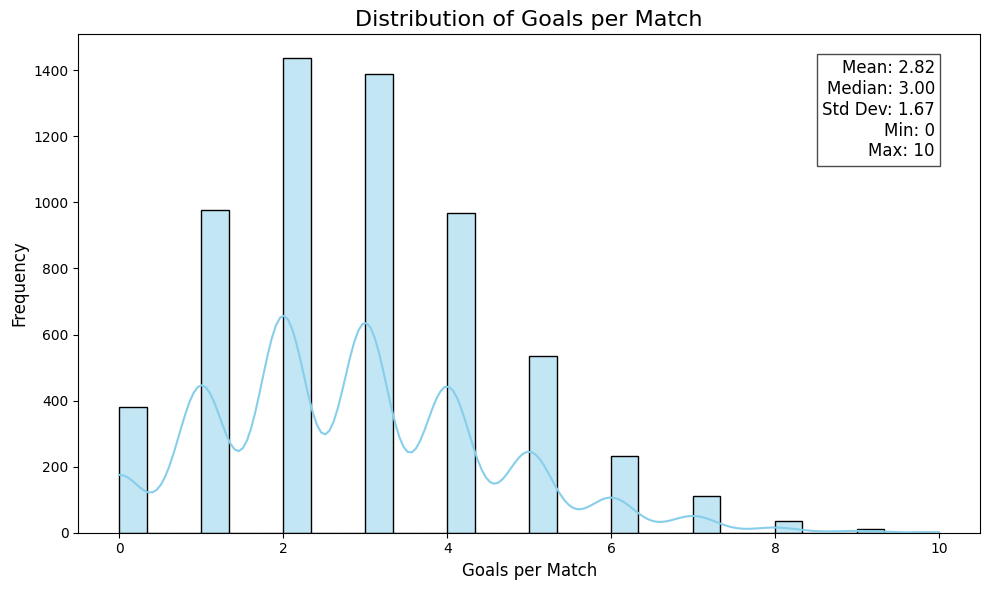

In [37]:
plt.figure(figsize=(10, 6))
goals_per_match = data["goals_per_match"]

sns.histplot(goals_per_match, kde=True, color='skyblue', bins=30)

# Adding titles and labels
plt.title('Distribution of Goals per Match', fontsize=16)
plt.xlabel('Goals per Match', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Calculating and displaying interesting statistics
mean_goals = np.mean(goals_per_match)
std_goals = np.std(goals_per_match)
median_goals = np.median(goals_per_match)
min_goals = np.min(goals_per_match)
max_goals = np.max(goals_per_match)

# Displaying the stats on the plot
stats_text = f'Mean: {mean_goals:.2f}\nMedian: {median_goals:.2f}\nStd Dev: {std_goals:.2f}\nMin: {min_goals}\nMax: {max_goals}'
plt.text(0.95, 0.95, stats_text, horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Show the plot
plt.tight_layout()
plt.show()

In [38]:
goals_per_match_mean = 3
goals_per_match_std = 1

For the second regression model, let’s predict the probability of a draw ($y = 1$) based on the **scoring category** (high vs. low). This binary outcome lends itself to **logistic regression**, which models the log-odds of $y = 1$ as a linear combination of predictors.

### Plan:
1. **Model Setup**:
   - **Prior**:
     - Intercept: Use a weakly informative normal prior, $ \text{Normal}(0, 5) $, as we expect the baseline log-odds to be close to 0.
     - Slope (scoring category): $ \text{Normal}(0, 5) $, allowing for large variations in the effect.
   - **Likelihood**: The outcome follows a Bernoulli distribution with success probability $p$.
   - Link function: $p = \text{logit}^{-1}(\beta_0 + \beta_1 \cdot X)$, where $X$ is the scoring category (encoded as 1 for high-scoring and 0 for low-scoring).

2. **Posterior Predictive Check**:
   - Simulate draws from the posterior predictive distribution to assess model fit.

3. **Predictive Distribution**:
   - Predict the probability of a draw for a specific test observation (e.g., high-scoring or low-scoring match).

Let’s proceed to implement this model.

# Model pooled

In [39]:
with pm.Model() as pooled_model:
    # Prior for the mean of goals per match
    mu = pm.Normal('mu', mu=goals_per_match_mean, sigma=goals_per_match_std)

    # Prior for the standard deviation (positive only) using HalfNormal
    sigma = pm.HalfNormal('sigma', sigma=goals_per_match_std)

    # Likelihood for the goals per match across all games
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data["goals_per_match"])

    # Sampling the model
    pooled_trace = pm.sample(2000)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.


In [40]:
# Plotting the posterior distributions
#pm.plot_trace(pooled_trace)
#plt.show()

In [41]:
pm.summary(pooled_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,2.820,0.021,2.781,2.861,0.0,0.0,8644.0,5937.0,1.0
sigma,1.669,0.015,1.640,1.697,0.0,0.0,8594.0,6074.0,1.0


# Unpooled Model

In [42]:
grouped_data = data.groupby(['Season', 'League'])['goals_per_match']

with pm.Model() as unpooled_model:
    lambda_dict = {}

    # Loop through each group (season and league)
    for (season, league), group_data in grouped_data:
        # Prior for the Poisson rate (lambda) for each group
        lambda_dict[(season, league)] = pm.HalfNormal(f'lambda_{season}_{league}', sigma=goals_per_match_std)

        # Likelihood for the goals in each match in the group (Poisson distribution)
        pm.Poisson(f'y_{season}_{league}', mu=lambda_dict[(season, league)], observed=group_data)

    # Sampling from the model
    unpooled_trace = pm.sample(10_000, return_inferencedata=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_2016_Premier League, lambda_2016_Serie A, lambda_2017_Premier League, lambda_2017_Serie A, lambda_2018_Premier League, lambda_2018_Serie A, lambda_2019_Premier League, lambda_2019_Serie A, lambda_2020_Premier League, lambda_2020_Serie A, lambda_2021_Premier League, lambda_2021_Serie A, lambda_2022_Premier League, lambda_2022_Serie A, lambda_2023_Premier League, lambda_2023_Serie A]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 28 seconds.


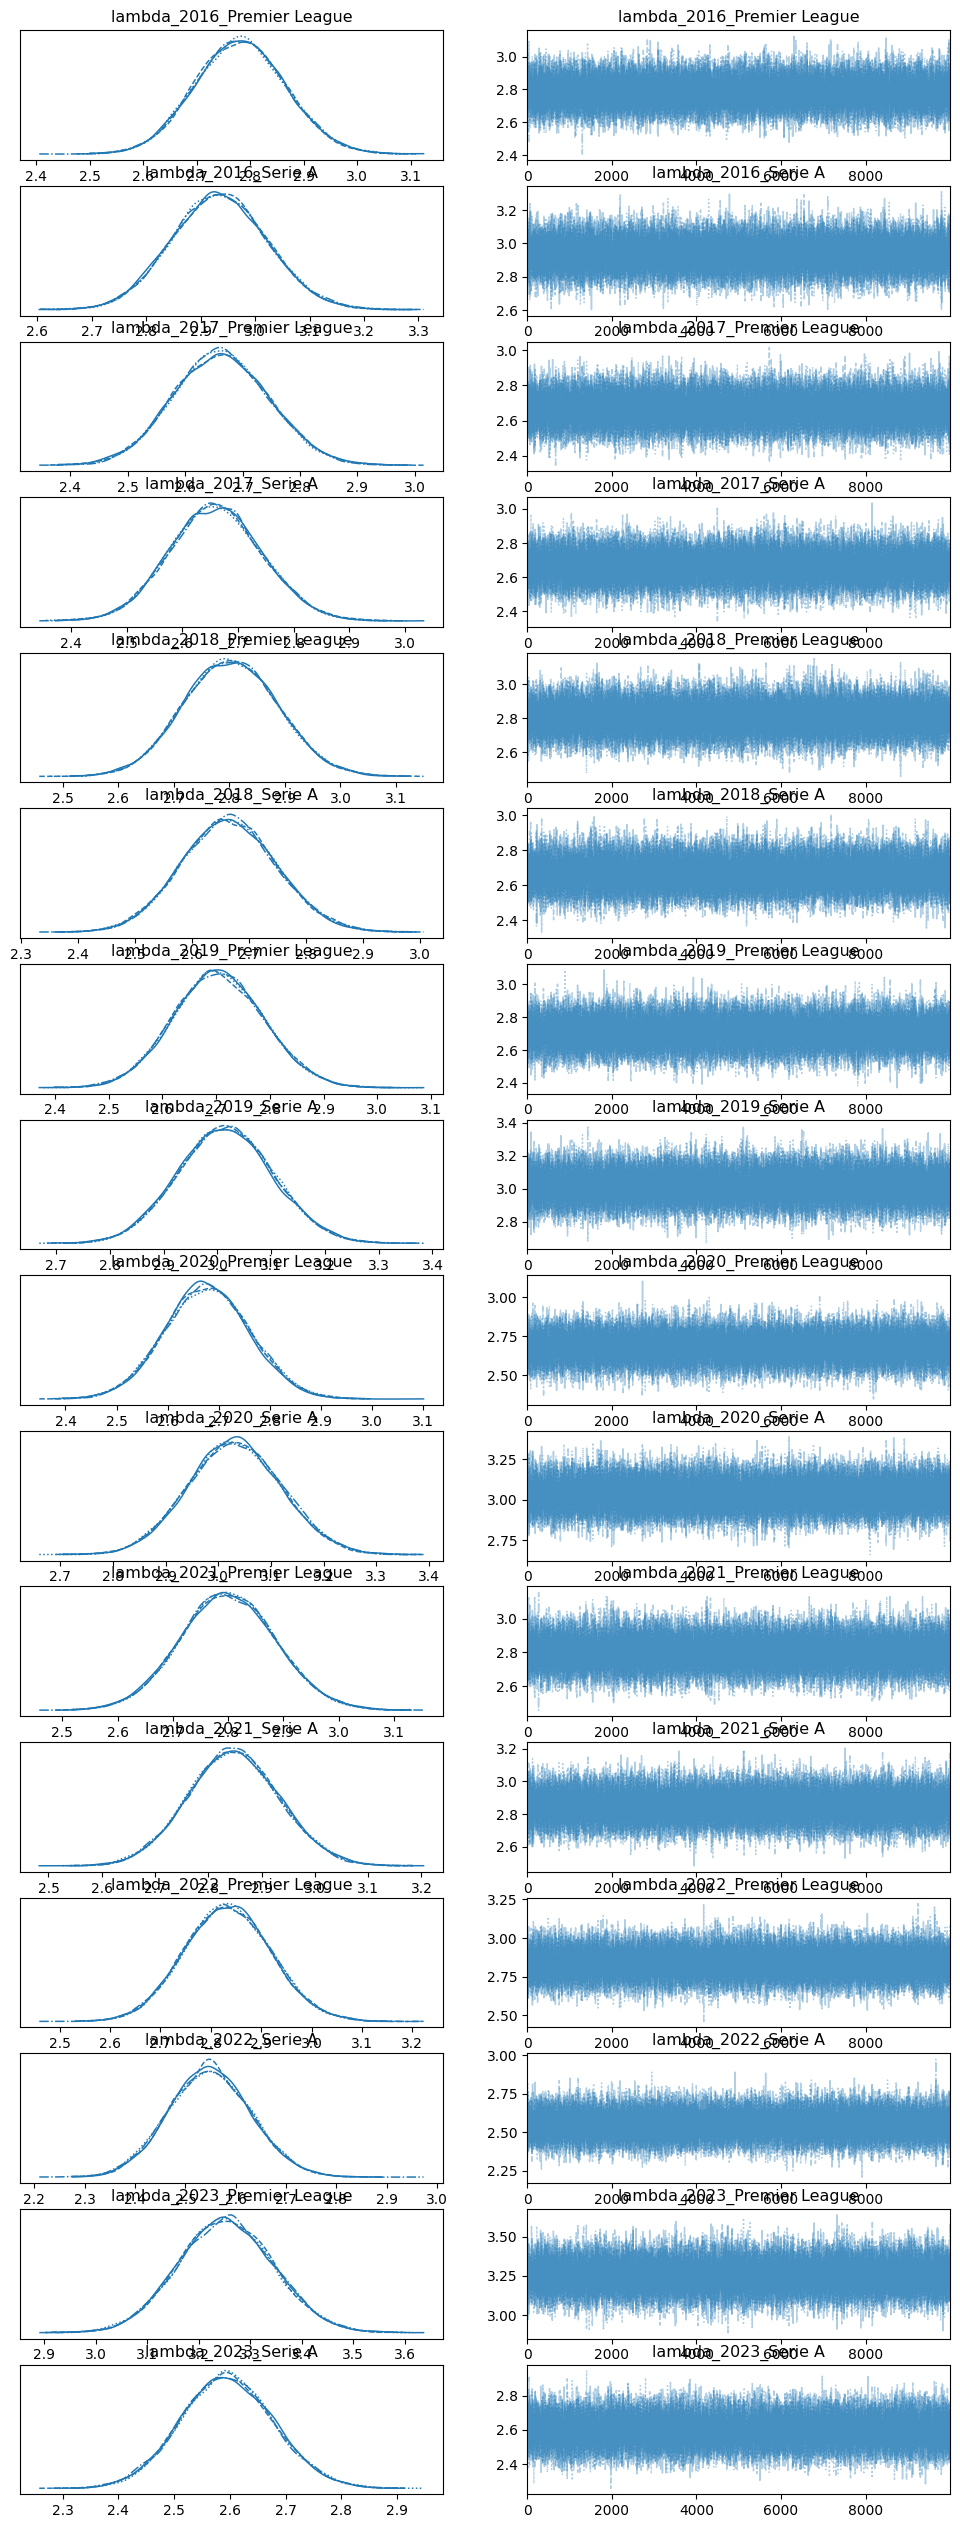

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda_2016_Premier League,2.782,0.084,2.621,2.936,0.0,0.0,69248.0,29899.0,1.0
lambda_2016_Serie A,2.935,0.087,2.772,3.098,0.0,0.0,78793.0,27899.0,1.0
lambda_2017_Premier League,2.663,0.083,2.504,2.817,0.0,0.0,77655.0,29536.0,1.0
lambda_2017_Serie A,2.660,0.083,2.502,2.813,0.0,0.0,74231.0,30575.0,1.0
lambda_2018_Premier League,2.803,0.085,2.641,2.959,0.0,0.0,72399.0,30320.0,1.0
lambda_2018_Serie A,2.665,0.084,2.502,2.817,0.0,0.0,68098.0,30244.0,1.0
lambda_2019_Premier League,2.704,0.084,2.550,2.867,0.0,0.0,72328.0,28930.0,1.0
lambda_2019_Serie A,3.016,0.088,2.850,3.180,0.0,0.0,66350.0,30110.0,1.0
lambda_2020_Premier League,2.678,0.083,2.526,2.839,0.0,0.0,73950.0,28717.0,1.0
lambda_2020_Serie A,3.031,0.089,2.861,3.194,0.0,0.0,64889.0,29707.0,1.0


In [43]:
pm.plot_trace(unpooled_trace)
plt.show()

pm.summary(unpooled_trace)

# Hierarchical model

In this case, you want to account for differences between teams (like in the "factory machine" example).

The idea is to model the goal counts for each team, while allowing for some "sharing" of information between teams based on their historical performance (across seasons).

Model description:
- The mean goal counts for each team ($\mu_j$) are drawn from a global mean ($\mu_\mu$).
- The global mean of goal counts, $\mu_\mu$, is assumed to be normally distributed with a prior belief, N(2, 1) for the mean number of goals scored per match.
- The standard deviation ($\sigma$) reflects the variance of goals scored for each match, shared across teams.
- The goal counts for each match ($y_ij$) are modeled as coming from a normal distribution with a team-specific mean ($\mu_j$) and a global standard deviation ($\sigma$).


In [44]:
goals_per_match_mean = data["goals_per_match"].mean()
goals_per_match_std = data["goals_per_match"].std()

# Calculate team-level mean and standard deviation
team_stats = data.groupby("HomeTeam")["goals_per_match"].agg(["mean", "std"]).reset_index()
team_stats.rename(columns={"mean": "team_mean", "std": "team_std"}, inplace=True)

goals_per_match_mean, goals_per_match_std

(2.8192434210526316, 1.6691440527063923)

In [45]:
team_stats

,HomeTeam,team_mean,team_std
0,Arsenal,3.197368,1.518275
1,Aston Villa,3.115789,1.773704
2,Atalanta,3.184211,1.896043
3,Benevento,3.184211,1.737586
4,Bologna,2.644737,1.519881
...,...,...,...
60,Verona,2.684211,1.465327
61,Watford,2.926316,1.677397
62,West Brom,2.684211,1.702497
63,West Ham,2.921053,1.550588


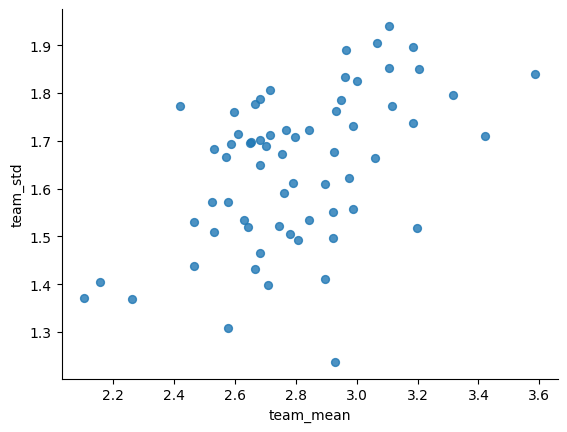

In [46]:
team_stats.plot(kind='scatter', x='team_mean', y='team_std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
global_mean = team_stats['team_mean'].mean()
global_std = team_stats['team_mean'].std()

global_mean, global_std

(2.802521688837478, 0.2764000298868852)

In [48]:
teams = data['HomeTeam'].unique()
n_teams = len(teams)

# Map team names to indices for the model
team_idx = data['HomeTeam'].map({team: idx for idx, team in enumerate(teams)}).values

with pm.Model() as hierarchical_model:
    # Global mean and standard deviation
    mu_mu = pm.Normal("mu_mu", mu=global_mean, sigma=global_std)  # Use global_mean and global_std
    sigma_global = pm.HalfNormal("sigma_global", sigma=global_std)  # Prior based on global_std

    # Team-level means
    mu_team = pm.Normal("mu_team", mu=mu_mu, sigma=sigma_global, shape=n_teams)

    # Match-level standard deviation
    sigma = pm.HalfNormal("sigma", sigma=global_mean)  # Can remain the same

    # Observed goals per match
    y_obs = pm.Normal("y_obs", mu=mu_team[team_idx], sigma=sigma, observed=data['goals_per_match'])

    # Sampling the model
    trace_hierarchical = pm.sample(2_000, return_inferencedata=True)

# Posterior summary
pm.summary(trace_hierarchical)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_mu, sigma_global, mu_team, sigma]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_mu,2.810,0.033,2.746,2.871,0.000,0.000,4638.0,5748.0,1.0
mu_team[0],3.065,0.113,2.860,3.279,0.001,0.001,8008.0,5563.0,1.0
mu_team[1],2.881,0.108,2.688,3.091,0.001,0.001,11068.0,5651.0,1.0
mu_team[2],2.860,0.118,2.643,3.085,0.001,0.001,8801.0,5768.0,1.0
mu_team[3],2.598,0.117,2.377,2.814,0.001,0.001,7285.0,5916.0,1.0
...,...,...,...,...,...,...,...,...,...
mu_team[62],2.868,0.169,2.546,3.185,0.002,0.001,9787.0,5457.0,1.0
mu_team[63],2.706,0.174,2.381,3.041,0.002,0.001,7789.0,5321.0,1.0
mu_team[64],2.845,0.171,2.526,3.174,0.002,0.001,8765.0,5373.0,1.0
sigma_global,0.186,0.030,0.127,0.242,0.001,0.000,2017.0,2730.0,1.0


c:\Users\miror\Dropbox\SUPSI\Terzo anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\arviz\plots\plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'mu_mu'}>,
        <Axes: title={'center': 'mu_team\n0'}>,
        <Axes: title={'center': 'mu_team\n1'}>,
        <Axes: title={'center': 'mu_team\n2'}>],
       [<Axes: title={'center': 'mu_team\n3'}>,
        <Axes: title={'center': 'mu_team\n4'}>,
        <Axes: title={'center': 'mu_team\n5'}>,
        <Axes: title={'center': 'mu_team\n6'}>],
       [<Axes: title={'center': 'mu_team\n7'}>,
        <Axes: title={'center': 'mu_team\n8'}>,
        <Axes: title={'center': 'mu_team\n9'}>,
        <Axes: title={'center': 'mu_team\n10'}>],
       [<Axes: title={'center': 'mu_team\n11'}>,
        <Axes: title={'center': 'mu_team\n12'}>,
        <Axes: title={'center': 'mu_team\n13'}>,
        <Axes: title={'center': 'mu_team\n14'}>],
       [<Axes: title={'center': 'mu_team\n15'}>,
        <Axes: title={'center': 'mu_team\n16'}>,
        <Axes: title={'center': 'mu_team\n17'}>,
        <Axes: title={'center': 'mu_team\n18'}>],
       [<Axes: title={'center':

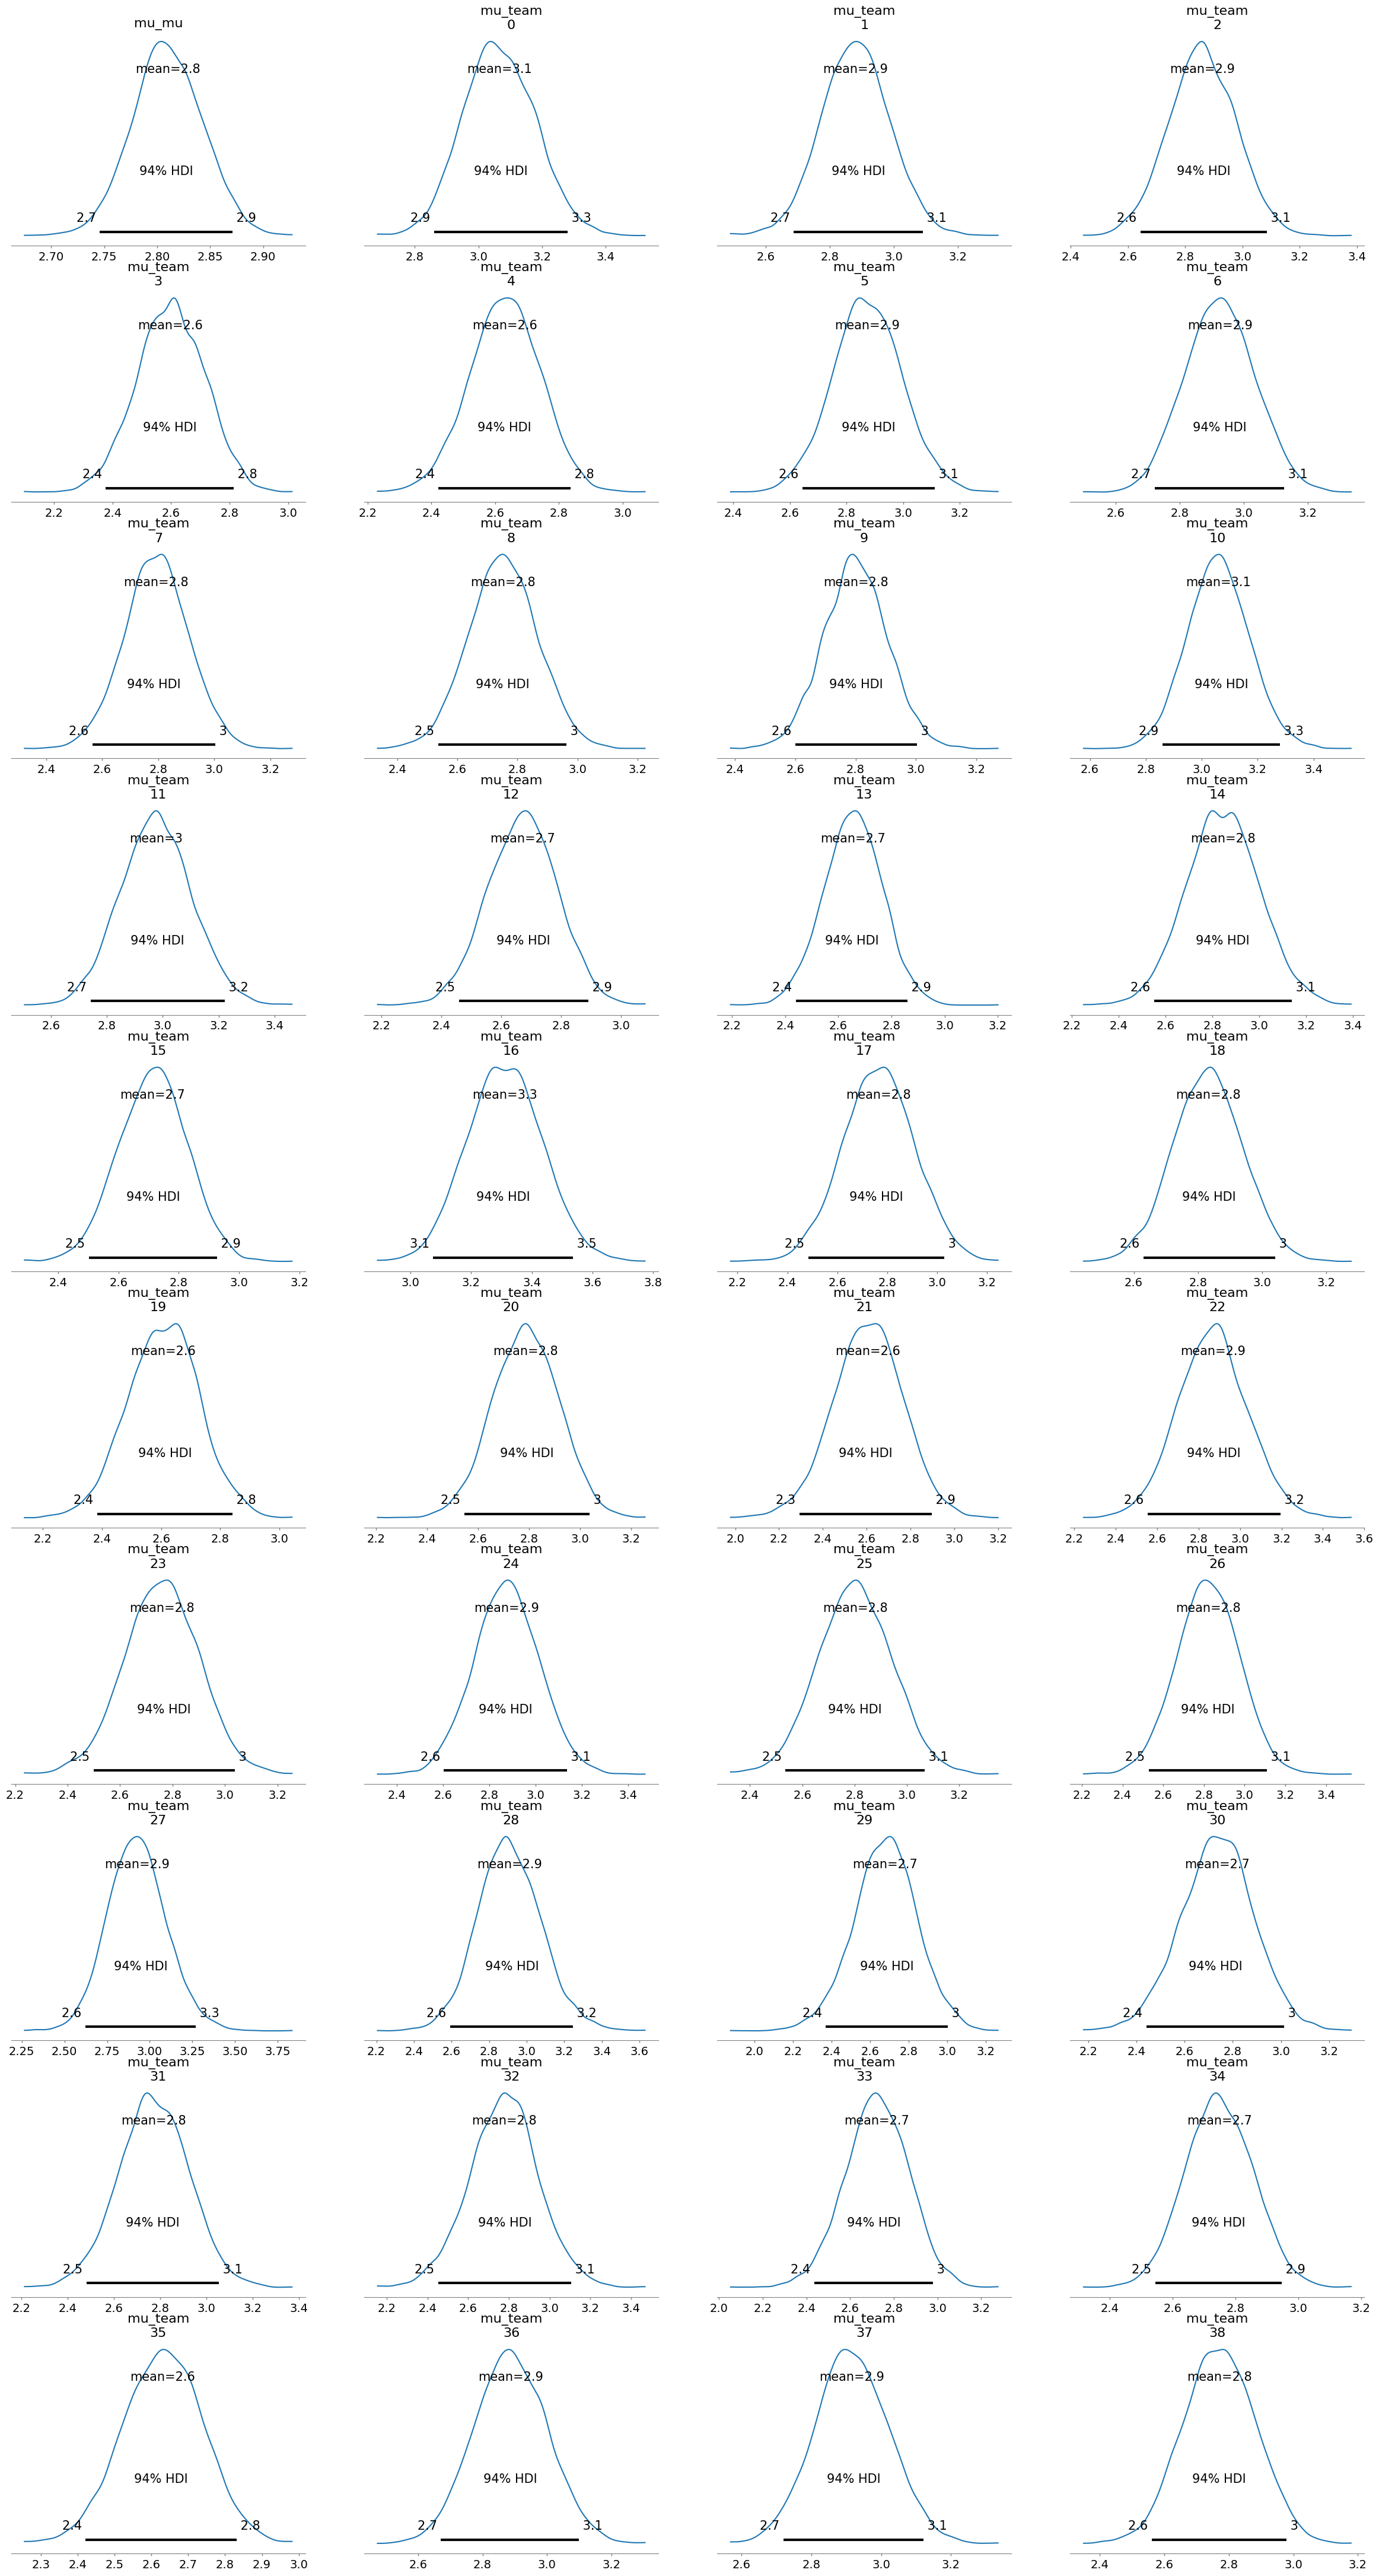

In [49]:
az.summary(trace_hierarchical)
az.plot_posterior(trace_hierarchical)

In [50]:
with hierarchical_model:
    posterior_predictive = pm.sample_posterior_predictive(trace_hierarchical)

Sampling: [y_obs]


c:\Users\miror\Dropbox\SUPSI\Terzo 
anno\Bayesian_Programming\Bayesian_proj\Bayesian_Venv\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [51]:
posterior_goals = posterior_predictive['observed_data']
posterior_goals

<xarray.Dataset> Size: 73kB
Dimensions:      (y_obs_dim_0: 6080)
Coordinates:
  * y_obs_dim_0  (y_obs_dim_0) int32 24kB 0 1 2 3 4 ... 6075 6076 6077 6078 6079
Data variables:
    y_obs        (y_obs_dim_0) float64 49kB 5.0 5.0 2.0 3.0 ... 3.0 1.0 4.0 1.0
Attributes:
    created_at:                 2025-01-15T15:54:38.357750+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.20.0

In [52]:
predicted_goals = posterior_predictive["posterior_predictive"]
predicted_goals = predicted_goals['y_obs']

In [54]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [55]:
plt.figure(10, 6)
az.plot_ppc(posterior_predictive, var_names=["y_obs"])
plt.show()

TypeError: Value after * must be an iterable, not int

In [ ]:
plt.figure(figsize=(10, 6))
az.plot_ppc(posterior_predictive, var_names=["y_obs"], backend="bokeh")
plt.show()